In [5]:
import pandas as pd

# Load the data
calls_data = pd.read_csv('callsf0d4f5a.csv')
sentiment_data = pd.read_csv('sentiment_statisticscc1e57a.csv')

# Convert datetime columns
calls_data['call_start_datetime'] = pd.to_datetime(calls_data['call_start_datetime'])
calls_data['agent_assigned_datetime'] = pd.to_datetime(calls_data['agent_assigned_datetime'])
calls_data['call_end_datetime'] = pd.to_datetime(calls_data['call_end_datetime'])

# Calculate AHT (Average Handle Time) and AST (Average Speed to Answer)
calls_data['AHT'] = (calls_data['call_end_datetime'] - calls_data['agent_assigned_datetime']).dt.total_seconds()
calls_data['AST'] = (calls_data['agent_assigned_datetime'] - calls_data['call_start_datetime']).dt.total_seconds()

# Merge the data
merged_data = pd.merge(calls_data, sentiment_data, on='call_id')

# Group by customer sentiment to analyze key drivers
sentiment_impact = merged_data.groupby('customer_tone').agg(
    average_aht=('AHT', 'mean'),
    average_ast=('AST', 'mean'),
    sentiment_score=('average_sentiment', 'mean'),
    silence_avg=('silence_percent_average', 'mean')
).reset_index()

# Display the results
print(sentiment_impact)


  customer_tone  average_aht  average_ast  sentiment_score  silence_avg
0         angry   695.530261   436.445031        -0.032427     0.286450
1          calm   699.604098   437.832299        -0.032501     0.284908
2    frustrated   692.738764   436.803371        -0.034490     0.283494
3       neutral   707.625312   437.754085        -0.033709     0.288883
4        polite   689.659731   436.499896        -0.034475     0.283799


In [7]:
# Rewriting the entire code flow to avoid errors

import pandas as pd



# Convert relevant datetime columns to datetime format for calculations
calls_data['call_start_datetime'] = pd.to_datetime(calls_data['call_start_datetime'])
calls_data['agent_assigned_datetime'] = pd.to_datetime(calls_data['agent_assigned_datetime'])
calls_data['call_end_datetime'] = pd.to_datetime(calls_data['call_end_datetime'])

# Calculate AHT (Average Handle Time) and AST (Average Speed to Answer)
calls_data['AHT'] = (calls_data['call_end_datetime'] - calls_data['agent_assigned_datetime']).dt.total_seconds()
calls_data['AST'] = (calls_data['agent_assigned_datetime'] - calls_data['call_start_datetime']).dt.total_seconds()

# Merge the calls data with sentiment data based on 'call_id'
merged_data = pd.merge(calls_data, sentiment_data, on='call_id')

# Grouping by agent's emotion (tone) to analyze its impact on AHT
agent_emotion_impact = merged_data.groupby('agent_tone').agg(
    average_aht=('AHT', 'mean'),
    call_count=('call_id', 'count')
).reset_index()

# Display the result
agent_emotion_impact


,agent_tone,average_aht,call_count
0,angry,394.395887,389
1,calm,626.499696,24675
2,frustrated,617.068404,3684
3,neutral,750.276439,42758
4,polite,220.000000,87


In [9]:
# Rewriting the code from scratch to build the correlation matrix

import pandas as pd



# Convert relevant datetime columns to datetime format for calculations
calls_data['call_start_datetime'] = pd.to_datetime(calls_data['call_start_datetime'])
calls_data['agent_assigned_datetime'] = pd.to_datetime(calls_data['agent_assigned_datetime'])
calls_data['call_end_datetime'] = pd.to_datetime(calls_data['call_end_datetime'])

# Calculate AHT (Average Handle Time) and AST (Average Speed to Answer)
calls_data['AHT'] = (calls_data['call_end_datetime'] - calls_data['agent_assigned_datetime']).dt.total_seconds()
calls_data['AST'] = (calls_data['agent_assigned_datetime'] - calls_data['call_start_datetime']).dt.total_seconds()

# Merge the calls data with sentiment data based on 'call_id'
merged_data = pd.merge(calls_data, sentiment_data, on='call_id')

# Building a correlation matrix to analyze how sentiment and silence impact AHT and AST
correlation_matrix = merged_data[['AHT', 'AST', 'average_sentiment', 'silence_percent_average']].corr()

# Displaying the correlation matrix
correlation_matrix


,AHT,AST,average_sentiment,silence_percent_average
AHT,1.000000,-0.027778,-0.076065,0.406883
AST,-0.027778,1.000000,0.039881,-0.012068
average_sentiment,-0.076065,0.039881,1.000000,0.035339
silence_percent_average,0.406883,-0.012068,0.035339,1.000000


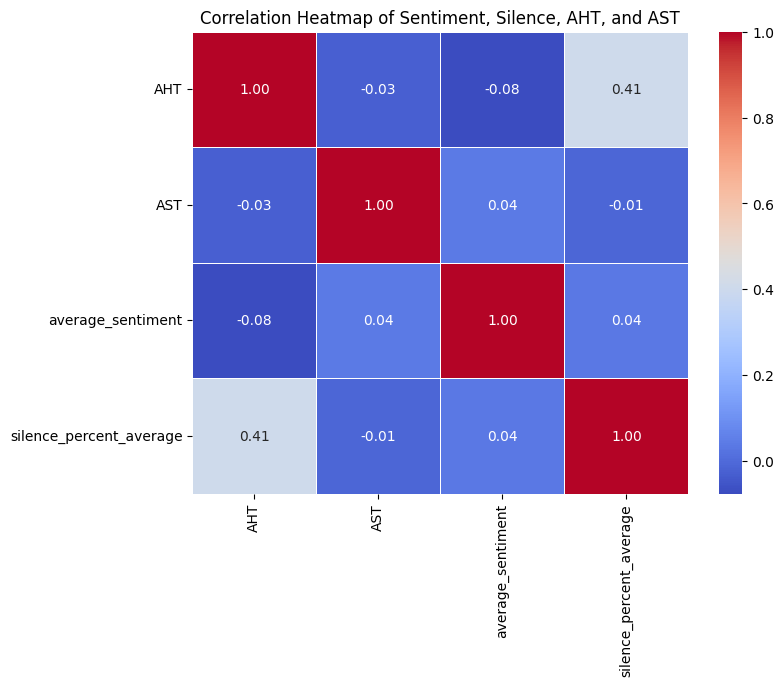

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Heatmap of Sentiment, Silence, AHT, and AST')
plt.show()


In [12]:
merged_data

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,call_date
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,963118,neutral,angry,-0.04,0.39,2024-07-31
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,519057,calm,neutral,0.02,0.35,2024-08-01
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,158319,neutral,polite,-0.13,0.32,2024-07-31
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,488324,neutral,frustrated,-0.20,0.20,2024-08-01
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,721730,neutral,polite,-0.05,0.35,2024-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,1680.0,540.0,413148,calm,calm,0.05,0.34,2024-08-31
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,480.0,180.0,980156,calm,frustrated,0.03,0.22,2024-08-31
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,360.0,360.0,616988,calm,polite,0.05,0.42,2024-08-31
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,\n\nAgent: Thank you for calling United Airlin...,240.0,360.0,161354,neutral,polite,-0.07,0.13,2024-08-31


In [13]:
import pandas as pd

# Extracting the date from the 'call_start_datetime'
merged_data['call_date'] = merged_data['call_start_datetime'].dt.date

# Grouping data by agent_id and call_date to get number of clients handled and average sentiment
agent_daily_clients = merged_data.groupby(['agent_id_x', 'call_date']).agg(
    clients_handled=('call_id', 'count'),
    avg_agent_sentiment=('average_sentiment', 'mean')
).reset_index()

# Calculating the correlation between clients handled and agent sentiment
correlation = agent_daily_clients[['clients_handled', 'avg_agent_sentiment']].corr()

# Displaying the correlation
print(correlation)


                     clients_handled  avg_agent_sentiment
clients_handled             1.000000             0.006617
avg_agent_sentiment         0.006617             1.000000


In [15]:
import pandas as pd



# Merge and preprocess the data as needed
calls_data['call_start_datetime'] = pd.to_datetime(calls_data['call_start_datetime'])
calls_data['agent_assigned_datetime'] = pd.to_datetime(calls_data['agent_assigned_datetime'])
calls_data['call_end_datetime'] = pd.to_datetime(calls_data['call_end_datetime'])

# Calculate AHT (Average Handle Time) and AST (Average Speed to Answer)
calls_data['AHT'] = (calls_data['call_end_datetime'] - calls_data['agent_assigned_datetime']).dt.total_seconds()
calls_data['AST'] = (calls_data['agent_assigned_datetime'] - calls_data['call_start_datetime']).dt.total_seconds()

# Merge with sentiment data
merged_data = pd.merge(calls_data, sentiment_data, on='call_id')

# Extract date part for daily aggregation
merged_data['call_date'] = merged_data['call_start_datetime'].dt.date


In [17]:
agent_daily_clients = merged_data.groupby(['agent_id_x', 'call_date']).agg(
    clients_handled=('call_id', 'count'),
    avg_agent_sentiment=('average_sentiment', 'mean')
).reset_index()

In [19]:
agent_daily_clients_cleaned = agent_daily_clients.dropna(subset=['avg_agent_sentiment'])


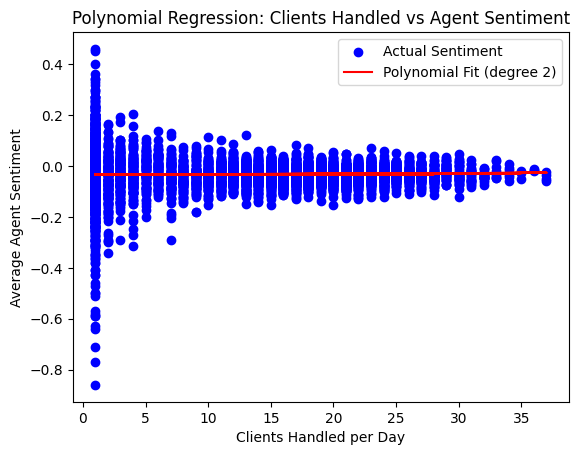

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Extracting the number of clients handled and average sentiment
X = agent_daily_clients_cleaned[['clients_handled']].values
y = agent_daily_clients_cleaned['avg_agent_sentiment'].values




In [63]:
calls_data['call_start_datetime'] = pd.to_datetime(calls_data['call_start_datetime'])
calls_data['agent_assigned_datetime'] = pd.to_datetime(calls_data['agent_assigned_datetime'])
calls_data['call_end_datetime'] = pd.to_datetime(calls_data['call_end_datetime'])

# Calculate AHT (Average Handle Time) and AST (Average Speed to Answer)
calls_data['AHT'] = (calls_data['call_end_datetime'] - calls_data['agent_assigned_datetime']).dt.total_seconds()/60
calls_data['AST'] = (calls_data['agent_assigned_datetime'] - calls_data['call_start_datetime']).dt.total_seconds()/60

In [64]:
calls_data[['agent_assigned_datetime', 'call_end_datetime', 'AHT']].head()

,agent_assigned_datetime,call_end_datetime,AHT
0,2024-08-01 00:03:00,2024-08-01 00:34:00,31.0
1,2024-08-01 00:06:00,2024-08-01 00:18:00,12.0
2,2024-08-01 00:07:00,2024-08-01 00:26:00,19.0
3,2024-08-01 00:10:00,2024-08-01 00:17:00,7.0
4,2024-08-01 00:14:00,2024-08-01 00:23:00,9.0


In [65]:
calls_data[['call_start_datetime', 'agent_assigned_datetime', 'AST']].head()

,call_start_datetime,agent_assigned_datetime,AST
0,2024-07-31 23:56:00,2024-08-01 00:03:00,7.0
1,2024-08-01 00:03:00,2024-08-01 00:06:00,3.0
2,2024-07-31 23:59:00,2024-08-01 00:07:00,8.0
3,2024-08-01 00:05:00,2024-08-01 00:10:00,5.0
4,2024-08-01 00:04:00,2024-08-01 00:14:00,10.0


In [66]:
import pandas as pd



# Merge the data
merged_data = pd.merge(calls_data, sentiment_data, on='call_id')

# Group by customer sentiment to analyze key drivers
sentiment_impact = merged_data.groupby('agent_tone').agg(
    average_aht=('AHT', 'mean'),
    average_ast=('AST', 'mean'),
    sentiment_score=('average_sentiment', 'mean'),
    silence_avg=('silence_percent_average', 'mean')
).reset_index()

# Display the results
print(sentiment_impact)


   agent_tone  average_aht  average_ast  sentiment_score  silence_avg
0       angry     6.573265     7.084833        -0.616478     0.190077
1        calm    10.441662     7.392138         0.101289     0.291409
2  frustrated    10.284473     7.073290        -0.329978     0.251336
3     neutral    12.504607     7.240727        -0.080355     0.286276
4      polite     3.666667     7.689655         0.673793     0.256552


In [29]:
sentiment_counts = sentiment_data.groupby(['agent_id', 'agent_tone']).size().unstack(fill_value=0)

# Calculate average sentiment score for each agent
avg_sentiment_per_agent = sentiment_data.groupby('agent_id')['average_sentiment'].mean()

# Merge sentiment counts with average sentiment scores
agent_sentiment_analysis = pd.merge(sentiment_counts, avg_sentiment_per_agent, on='agent_id')


In [30]:
agent_sentiment_analysis

,angry,calm,frustrated,neutral,polite,average_sentiment
agent_id,,,,,,
102574,0,1,0,1,0,-0.075000
103651,3,102,13,180,0,-0.027953
106000,0,36,3,74,0,-0.032124
107876,0,1,0,5,0,-0.065000
112609,0,5,0,6,0,-0.020909
...,...,...,...,...,...,...
981776,1,109,20,178,1,-0.026861
981779,1,68,12,145,1,-0.034714
982131,2,84,15,168,0,-0.038815


In [31]:
agent_sentiment_analysis['best_agent_score'] = agent_sentiment_analysis['calm'] + agent_sentiment_analysis['polite']


agent_sentiment_analysis['worst_agent_score'] = agent_sentiment_analysis['angry'] - agent_sentiment_analysis['average_sentiment']

In [32]:
best_agents = agent_sentiment_analysis.sort_values(by='best_agent_score', ascending=False).head(10)
worst_agents = agent_sentiment_analysis.sort_values(by='worst_agent_score', ascending=False).head(10)

# Display the best and worst agents
print("Best Agents:")
print(best_agents)

print("\nWorst Agents:")
print(worst_agents)

Best Agents:
          angry  calm  frustrated  neutral  polite  average_sentiment  \
agent_id                                                                
784648        4   172          22      216       0          -0.023188   
251287        5   167          19      294       0          -0.036543   
757349        2   166          25      267       0          -0.031978   
542034        3   158          18      263       0          -0.033747   
758927        2   154          17      207       1          -0.021732   
524049        1   154          22      225       0          -0.032655   
931734        2   153          31      250       1          -0.043333   
594957        3   153          33      289       0          -0.048938   
390819        0   153          19      208       0          -0.013500   
537208        5   152          20      230       0          -0.031499   

          best_agent_score  worst_agent_score  
agent_id                                       
784648        

In [33]:
agent_traffic = calls_data.groupby('agent_id').size().reset_index(name='total_calls')

# Display the result showing agent_id and the number of customers handled
print(agent_traffic)


     agent_id  total_calls
0      102574            2
1      103651          298
2      106000          113
3      107876            6
4      112609           11
..        ...          ...
378    981776          309
379    981779          227
380    982131          270
381    992521           46
382    993862          298

[383 rows x 2 columns]


In [34]:
low_threshold = agent_traffic['total_calls'].quantile(0.33)
high_threshold = agent_traffic['total_calls'].quantile(0.66)

# Function to assign traffic labels based on thresholds
def label_traffic(calls):
    if calls <= low_threshold:
        return 'less traffic'
    elif calls <= high_threshold:
        return 'medium traffic'
    else:
        return 'heavy traffic'

# Apply the labeling function to create traffic labels
agent_traffic['traffic_label'] = agent_traffic['total_calls'].apply(label_traffic)

# Display the labeled DataFrame
print(agent_traffic)

     agent_id  total_calls   traffic_label
0      102574            2    less traffic
1      103651          298   heavy traffic
2      106000          113  medium traffic
3      107876            6    less traffic
4      112609           11    less traffic
..        ...          ...             ...
378    981776          309   heavy traffic
379    981779          227  medium traffic
380    982131          270  medium traffic
381    992521           46    less traffic
382    993862          298   heavy traffic

[383 rows x 3 columns]


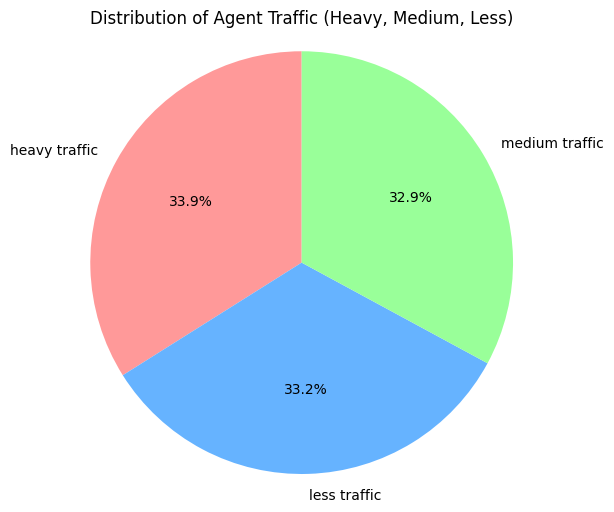

In [35]:
traffic_distribution = agent_traffic['traffic_label'].value_counts()

# Create a pie chart to visualize the traffic distribution
plt.figure(figsize=(6, 6))
plt.pie(traffic_distribution, labels=traffic_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Agent Traffic (Heavy, Medium, Less)')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()

    traffic_label  average_sentiment
0   heavy traffic          -0.033163
1    less traffic          -0.033714
2  medium traffic          -0.034210


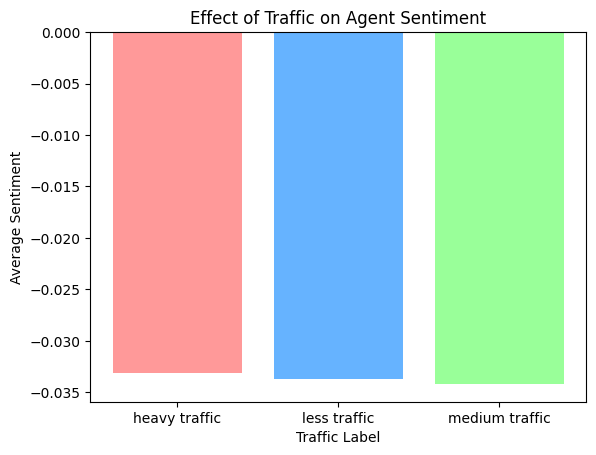

In [36]:
agent_sentiment_traffic = pd.merge(agent_traffic, sentiment_data, on='agent_id')

# Group by traffic label and calculate average sentiment
traffic_sentiment_analysis = agent_sentiment_traffic.groupby('traffic_label')['average_sentiment'].mean().reset_index()

# Display the result
print(traffic_sentiment_analysis)

# Optionally, you can visualize the analysis with a bar chart:
import matplotlib.pyplot as plt

plt.bar(traffic_sentiment_analysis['traffic_label'], traffic_sentiment_analysis['average_sentiment'], color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Effect of Traffic on Agent Sentiment')
plt.xlabel('Traffic Label')
plt.ylabel('Average Sentiment')
plt.show()











  custom_traffic_label  average_sentiment
0                 0-10          -0.025274
1              100-150          -0.035198
2              200-220          -0.028498
3              220-250          -0.034453
4              250-300          -0.033279
5                 300+          -0.033343
6                Other          -0.033730


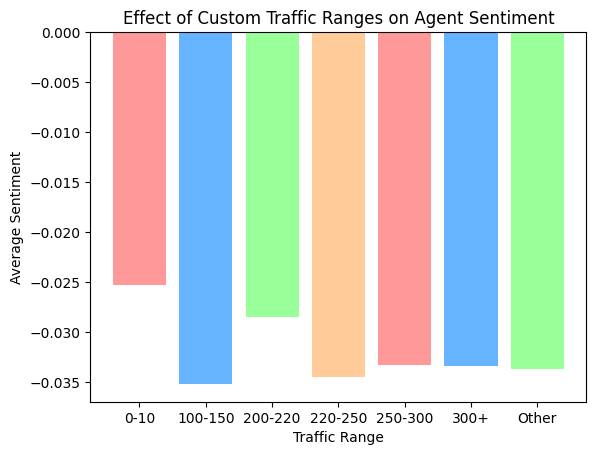

In [38]:
def custom_label_traffic(calls):
    if 0 <= calls <= 10:
        return '0-10'
    elif 100 <= calls <= 150:
        return '100-150'
    elif 200 <= calls <= 220:
        return '200-220'
    elif 220 <= calls <= 250:
        return '220-250'
    elif 250 <= calls <= 300:
        return '250-300'
    elif calls > 300:
        return '300+'
    else:
        return 'Other'

# Apply the custom labeling function
agent_traffic['custom_traffic_label'] = agent_traffic['total_calls'].apply(custom_label_traffic)

# Merge sentiment data with traffic data
agent_sentiment_traffic = pd.merge(agent_traffic, sentiment_data, on='agent_id')

# Group by the custom traffic label and calculate average sentiment for each range
custom_traffic_sentiment_analysis = agent_sentiment_traffic.groupby('custom_traffic_label')['average_sentiment'].mean().reset_index()

# Display the analysis result
print(custom_traffic_sentiment_analysis)

# Visualize the analysis with a bar chart
plt.bar(custom_traffic_sentiment_analysis['custom_traffic_label'], custom_traffic_sentiment_analysis['average_sentiment'], color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Effect of Custom Traffic Ranges on Agent Sentiment')
plt.xlabel('Traffic Range')
plt.ylabel('Average Sentiment')
plt.show()

customer_tone  angry  calm  frustrated  neutral  polite
agent_tone                                             
angry             77    68          86       80      78
calm            4922  4963        4890     4983    4917
frustrated       732   689         760      742     761
neutral         8618  8565        8447     8585    8543
polite            18    17          16       17      19


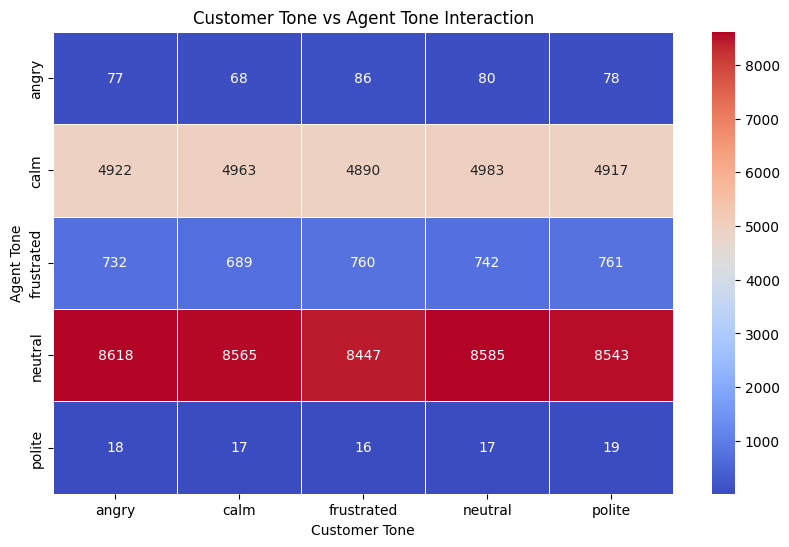

In [41]:
tone_interaction = sentiment_data.groupby(['agent_tone', 'customer_tone']).size().unstack(fill_value=0)

# Display the grouped data
print(tone_interaction)

# Visualize using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tone_interaction, annot=True, fmt="d", cmap="coolwarm", linewidths=.5)
plt.title('Customer Tone vs Agent Tone Interaction')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
plt.show()



customer_tone     angry      calm  frustrated   neutral    polite
agent_tone                                                       
angry         -0.594675 -0.642500   -0.620465 -0.588375 -0.639744
calm           0.103685  0.100173    0.101585  0.099653  0.101379
frustrated    -0.327773 -0.327417   -0.330105 -0.331307 -0.332996
neutral       -0.080034 -0.080865   -0.080468 -0.079891 -0.080524
polite         0.675556  0.738235    0.674375  0.617059  0.664737


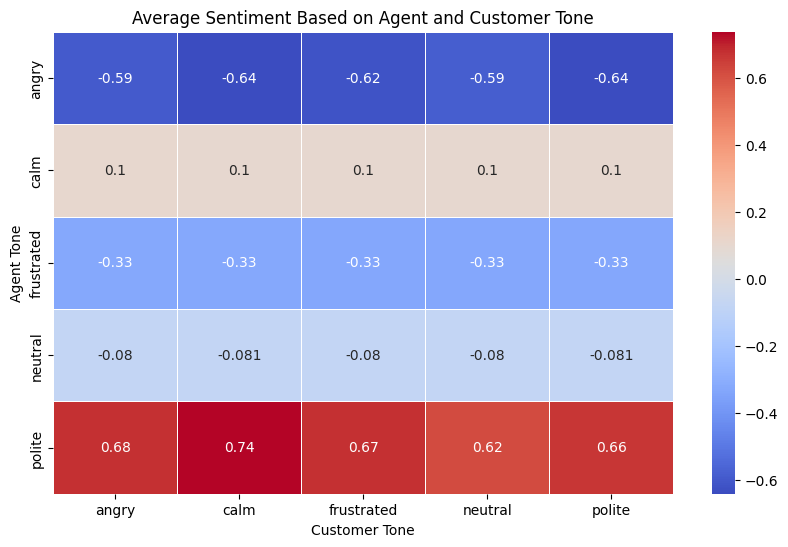

In [68]:

# Group by agent_tone and customer_tone to calculate average sentiment for each combination
sentiment_analysis = sentiment_data.groupby(['agent_tone', 'customer_tone'])['average_sentiment'].mean().unstack()

# Display the analysis of average sentiment based on agent and customer tone combinations
print(sentiment_analysis)

# Visualize with a heatmap to show how agent tones (calm, polite) affect customer sentiment
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_analysis, annot=True, cmap="coolwarm", linewidths=.5)
plt.title('Average Sentiment Based on Agent and Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
plt.show()


In [47]:
reasons_data = pd.read_csv('reason18315ff.csv')

   elite_level_code       AST
0               0.0  7.303644
1               1.0  7.272605
2               2.0  7.214649
3               3.0  7.155185
4               4.0  6.900561
5               5.0  6.832950


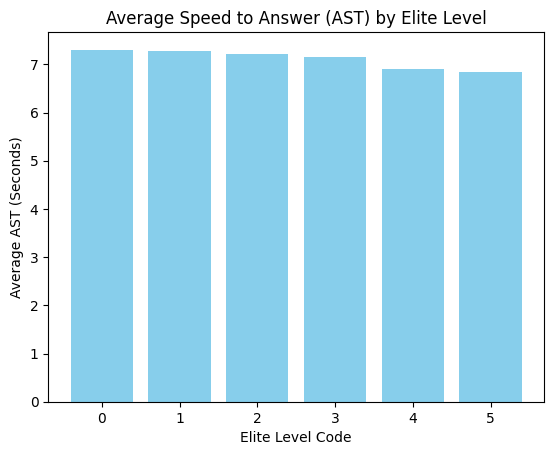

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
customers_data = pd.read_csv('customers2afd6ea.csv')

# Remove NaN values from customers data
customers_data_cleaned = customers_data.dropna()

# Merge the customers data with the calls data on 'call_id'
merged_data = pd.merge(customers_data_cleaned, calls_data, on='customer_id')

# Merge the resulting dataframe with the reasons data on 'call_id'
final_merged_data = pd.merge(merged_data, reasons_data, on='call_id')

# Group by 'elite_level_code' and calculate average AST (time in queue)
ast_by_elite_level = final_merged_data.groupby('elite_level_code')['AST'].mean().reset_index()

# Display the result
print(ast_by_elite_level)

# Visualization: Average AST by elite level
plt.bar(ast_by_elite_level['elite_level_code'], ast_by_elite_level['AST'], color='skyblue')
plt.title('Average Speed to Answer (AST) by Elite Level')
plt.xlabel('Elite Level Code')
plt.ylabel('Average AST (Seconds)')
plt.show()


In [70]:
final_merged_data['AST']

0         7.0
1         5.0
2        10.0
3         5.0
4         8.0
         ... 
42689     7.0
42690    10.0
42691     6.0
42692     3.0
42693    10.0
Name: AST, Length: 42694, dtype: float64

In [ ]:
#this is terrible someone with elite level code 4 should have atleast a gap of 4 minutes for his query being accepted

In [45]:
customers_data

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0
...,...,...,...
71805,8022667294,Dennis Singleton DDS,NaN
71806,4474867021,Paul Mitchell,1.0
71807,9762042472,Kaylee Lang,NaN
71808,8095620266,Christine Oneal,1.0


In [48]:
reasons_data

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating
...,...,...
66648,7569738090,Mileage Plus
66649,1563273072,Post Flight
66650,8865997781,Upgrade
66651,8019240181,Upgrade


In [56]:
#to be modified 
import pandas as pd



# Remove NaN values from customers data
customers_data_cleaned = customers_data.dropna()

# Merge the datasets (customers, calls, reasons)



agent_id
136010    11
163203     3
187770     4
198489     1
198686     8
          ..
901274     1
931340     2
937733     2
938715    14
992521     1
Length: 67, dtype: int64


In [57]:
final_merged_data = pd.merge(customers_data_cleaned, calls_data, on='customer_id')
final_merged_data = pd.merge(final_merged_data, reasons_data, on='call_id')

# Calculate average sentiment score for each agent
agent_sentiment = sentiment_data.groupby('agent_id')['average_sentiment'].mean().reset_index()

# Merge agent sentiment scores with the final merged data
final_merged_with_sentiment = pd.merge(final_merged_data, agent_sentiment, on='agent_id')

# Filter for elite level codes 4 and 5
elite_customers = final_merged_with_sentiment[final_merged_with_sentiment['elite_level_code'].isin([4, 5])]

# Sort agents by their average sentiment score and consider the top 20% of agents
top_agents = elite_customers.groupby('agent_id')['average_sentiment'].mean().reset_index()
top_agents_sorted = top_agents.sort_values(by='average_sentiment', ascending=False).head(int(len(top_agents) * 0.2))

# Count how many top agents are assigned to elite level customers (elite level 4 and 5)
top_agents_count = elite_customers[elite_customers['agent_id'].isin(top_agents_sorted['agent_id'])].groupby('agent_id').size()
top_agents_count.sum()
# Display the result
print(top_agents_count)

agent_id
136010    11
163203     3
187770     4
198489     1
198686     8
          ..
901274     1
931340     2
937733     2
938715    14
992521     1
Length: 67, dtype: int64
